# __3.0 Exploratory Data Analysis__ 

This section offers functionalities for comprehensive exploratory data analysis (EDA), covering univariate, bivariate, and multivariate analyses to gain insights into the dataset's characteristics and relationships.

* For univariate analysis, it provides visualizations and summaries for both categorical and numerical features, facilitating a deeper understanding of individual feature distributions.

* Bivariate analysis includes a correlation matrix heatmap, aiding in the exploration of pairwise relationships between numerical and low-cardinality categorical variables, enabling insights into potential correlations within the dataset.

* Multivariate analysis, leveraging geographical information and status groups, visualizes the spatial distribution of wells by their status, offering a nuanced perspective on the interplay between location and functionality.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
class EDA:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path, low_memory=False)  # Optimize memory usage for large files
        self.target_variable = "status_group"

    def univariate_analysis(self):
        print("\n\n======= Univariate Analysis =======\n")

        categorical_cols = self.df.select_dtypes(include=['object']).columns
        numerical_cols = ['amount_tsh', 'gps_height']

        # Categorical Features
        print("\n----- Categorical Features -----\n")
        for col in categorical_cols:
            if self.df[col].nunique() <= 25:  # Limit to max 2 unique values for faster plotting
                if self.df[col].nunique() <= 3:
                    plt.figure(figsize=(6, 6))
                    self.df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
                else:
                    plt.figure(figsize=(10, 6))
                    self.df[col].value_counts().plot(kind='bar')
                
                plt.title(f'Distribution of {col}', fontsize=14)
                plt.ylabel('Count' if self.df[col].nunique() > 3 else '')
                plt.xticks(rotation=45)  # Rotate labels for better readability
                plt.show()
            else:
                print(f"Skipping {col} (too many unique values: {self.df[col].nunique()})")
                
        # Numerical Features
        print("\n----- Numerical Features (amount_tsh, gps_height) -----\n")
        for col in numerical_cols:
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            sns.histplot(self.df[col], bins=20)  # Use fewer bins for faster rendering
            plt.title(f'Distribution of {col}', fontsize=14)
            plt.subplot(1, 2, 2)
            sns.boxplot(y=self.df[col])
            plt.title(f'Boxplot of {col}', fontsize=14)
            plt.tight_layout()
            plt.show()
        
    def bivariate_analysis(self):
        """Performs bivariate analysis with a correlation matrix heatmap."""
        print("\n\n======= Bivariate Analysis (Correlation Matrix Heatmap) =======\n")

        # Select numerical and low-cardinality categorical columns
        df_corr = self.df.select_dtypes(include=['number'])
        for col in self.df.select_dtypes(include=['object']):
            if self.df[col].nunique() <= 25:
                df_corr[col] = self.df[col].astype('category').cat.codes

        # Correlation matrix and heatmap
        corr_matrix = df_corr.corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Matrix Heatmap", fontsize=16)
        plt.show()    

    def multivariate_analysis(self):
        """Performs multivariate analysis with a heatmap based on latitude, longitude and status_group."""
        print("\n\n======= Multivariate Analysis (Geographical Distribution by Status) =======\n")

        plt.figure(figsize=(12, 8))

        # Define a custom colormap for the status_group
        status_colors = {"functional": "green", "non functional": "red", "functional needs repair": "orange"}
        cmap = ListedColormap([status_colors[x] for x in self.df[self.target_variable].unique()])

        # Create scatterplot and color based on the status
        plt.scatter(self.df['longitude'], self.df['latitude'], c=self.df[self.target_variable].map(status_colors), cmap=cmap, alpha=0.5)

        plt.title("Geographical Distribution by Well Status", fontsize=16)
        plt.xlabel("Longitude", fontsize=12)
        plt.ylabel("Latitude", fontsize=12)
        plt.colorbar(label="Well Status")
        plt.show()
    

eda = EDA("data/cleaned_training_set.csv")


## __Univariate Analysis__ 



======= Univariate Analysis =======


----- Categorical Features -----

Skipping funder (too many unique values: 1896)
Skipping installer (too many unique values: 2144)
Skipping wpt_name (too many unique values: 37398)


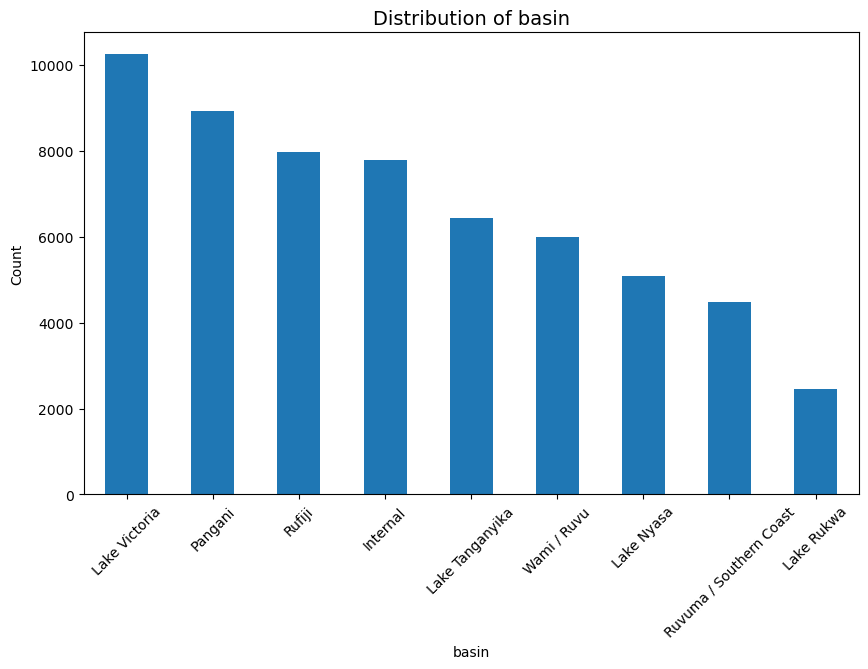

Skipping subvillage (too many unique values: 19287)


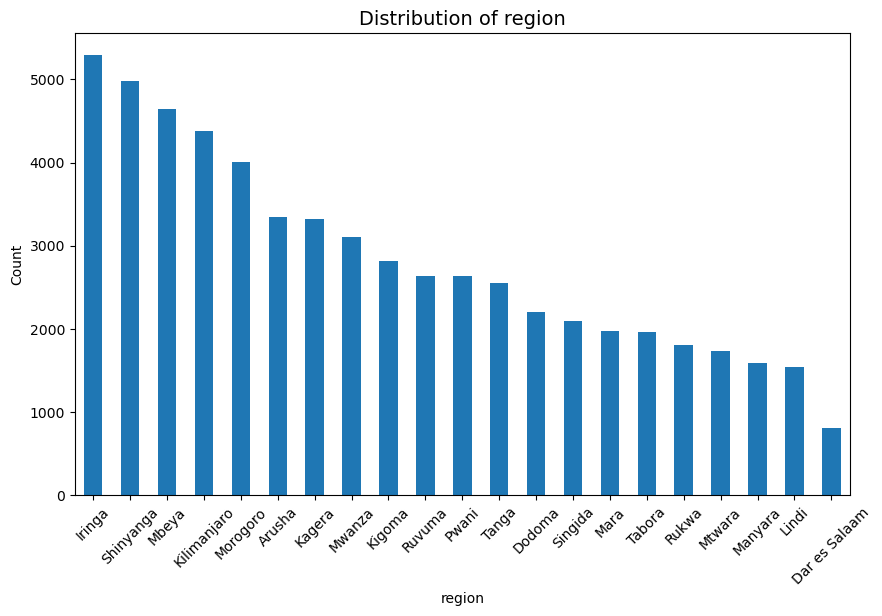

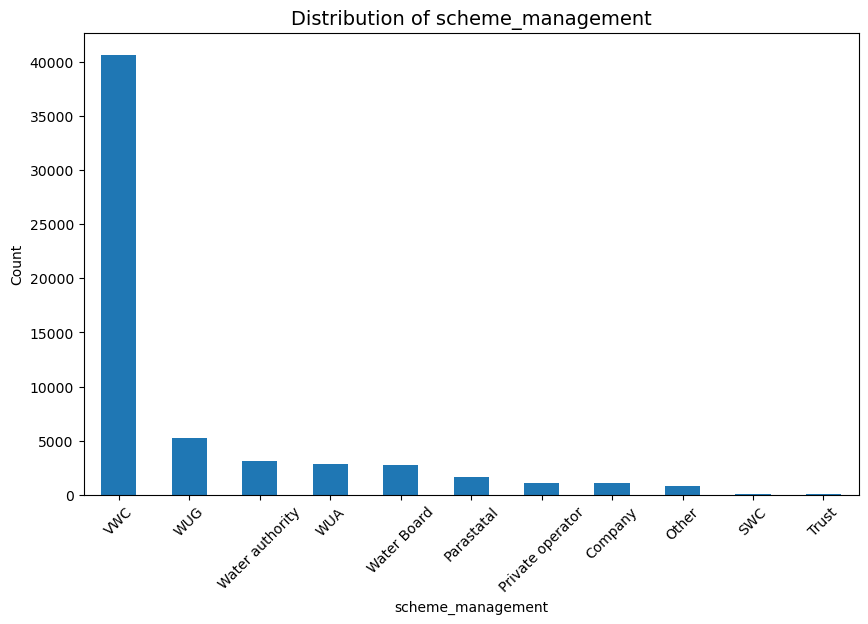

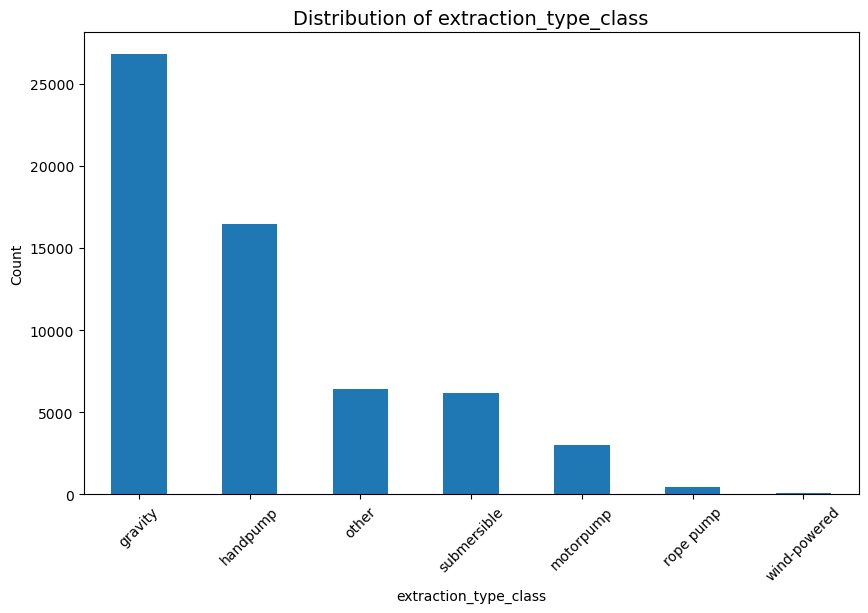

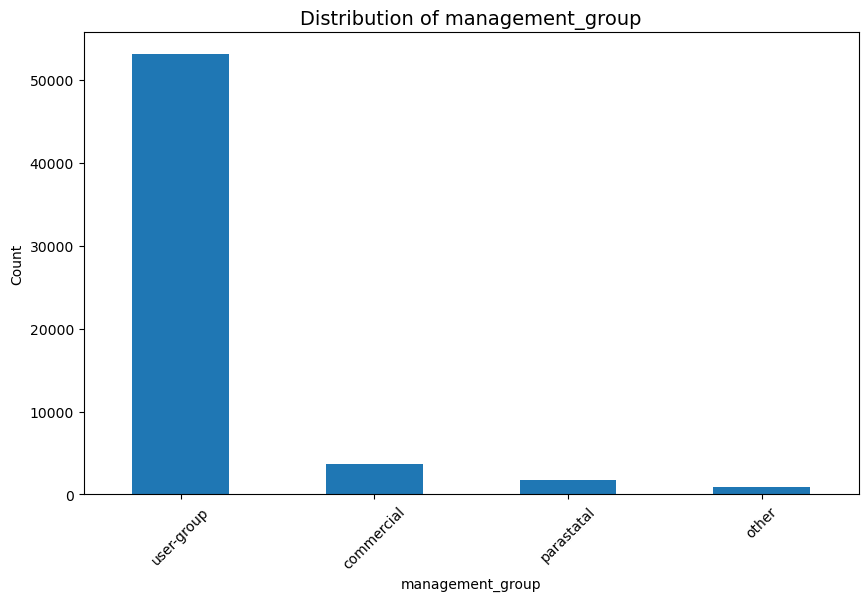

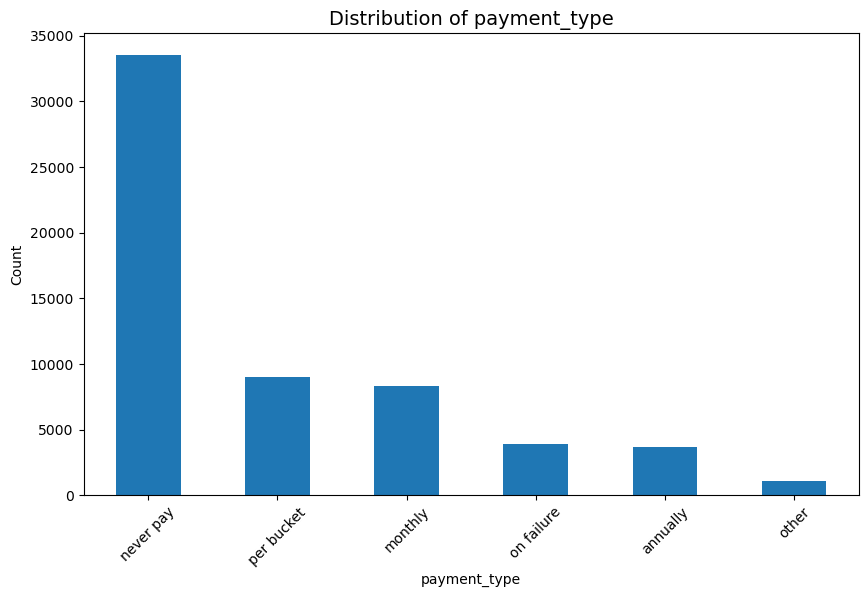

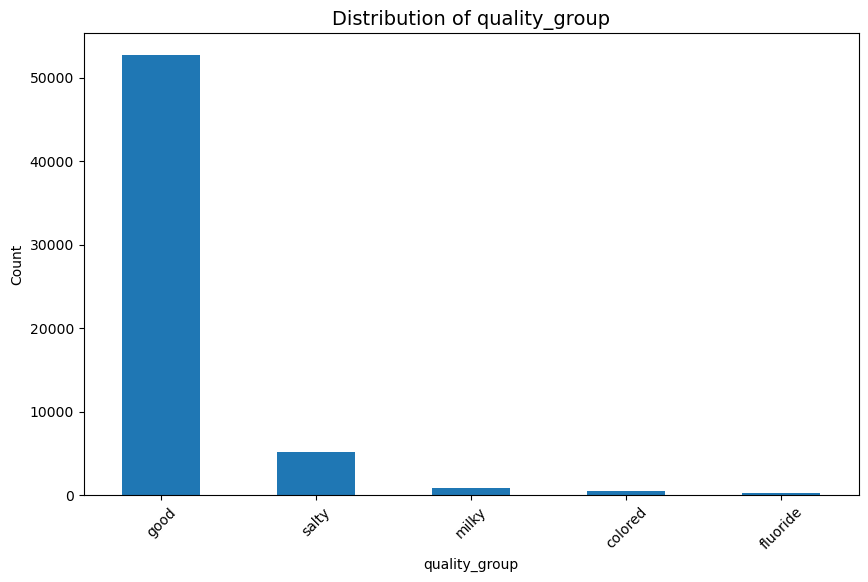

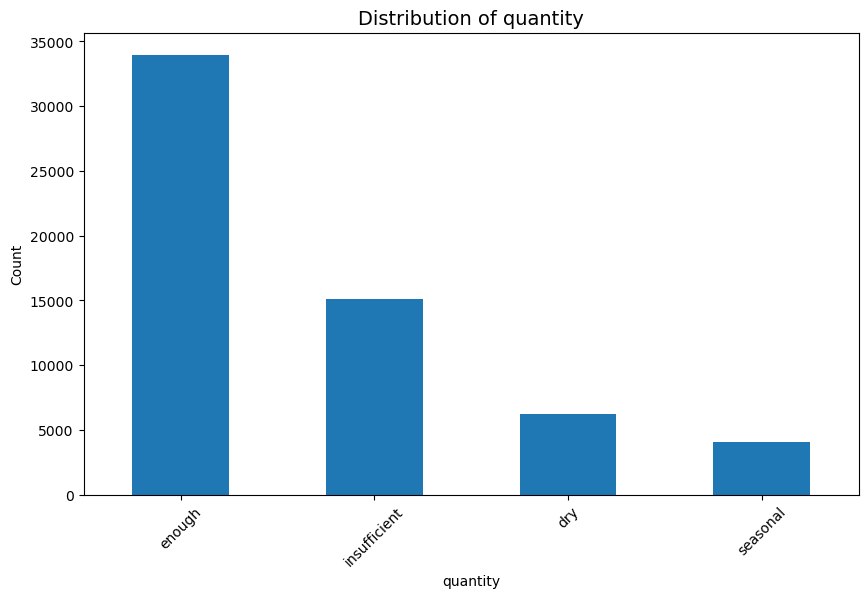

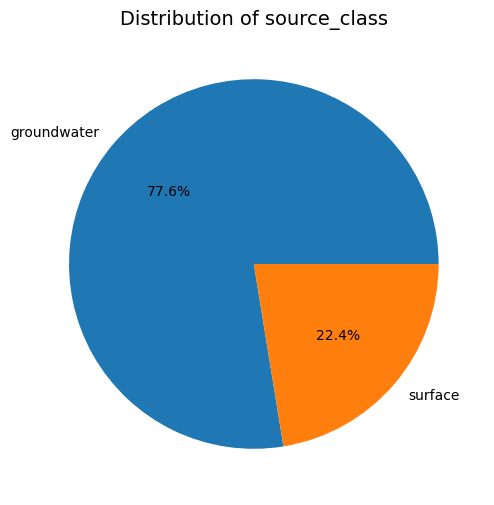

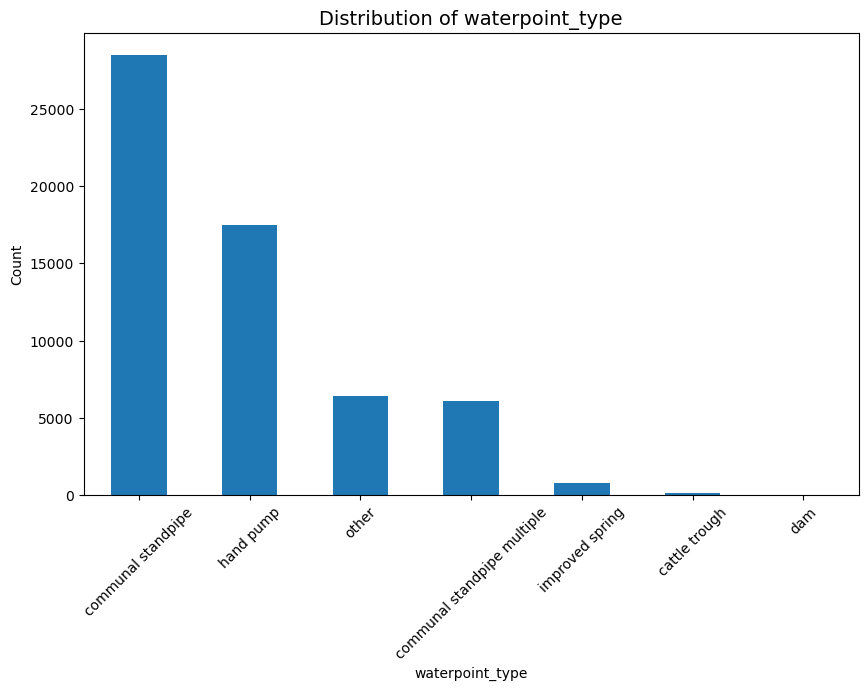

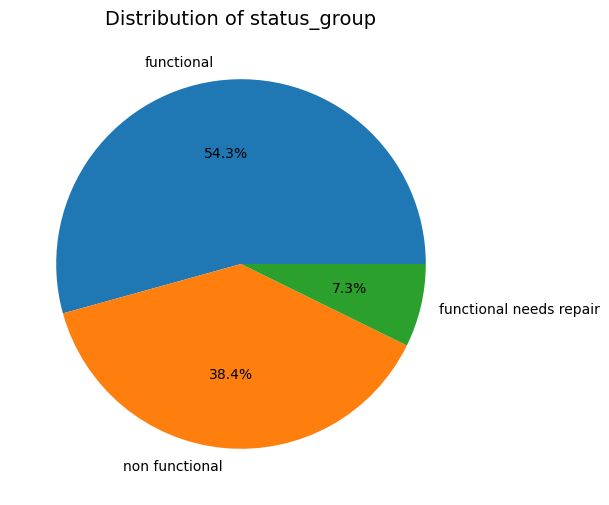


----- Numerical Features (amount_tsh, gps_height) -----



c:\Users\tonyg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


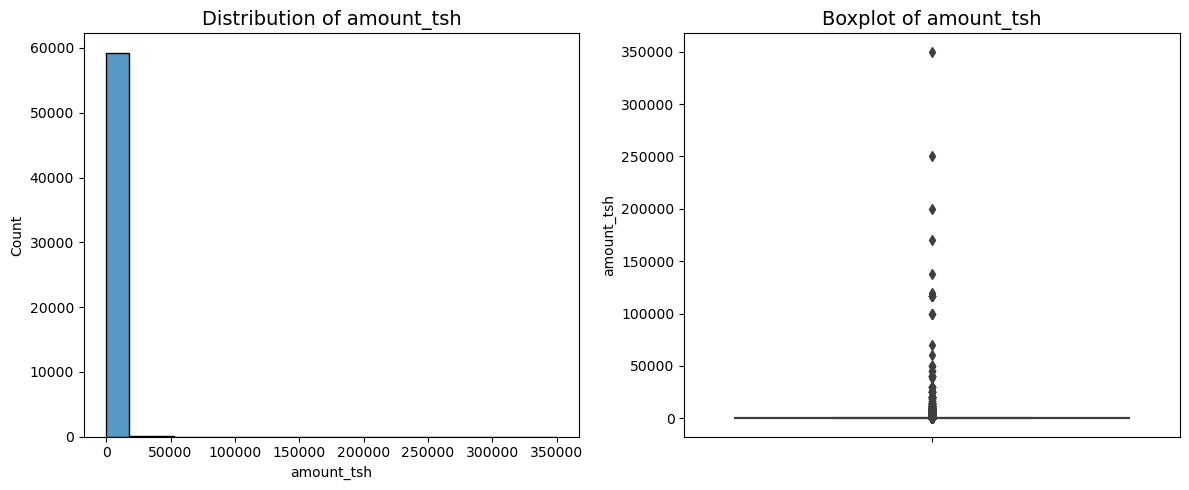

c:\Users\tonyg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


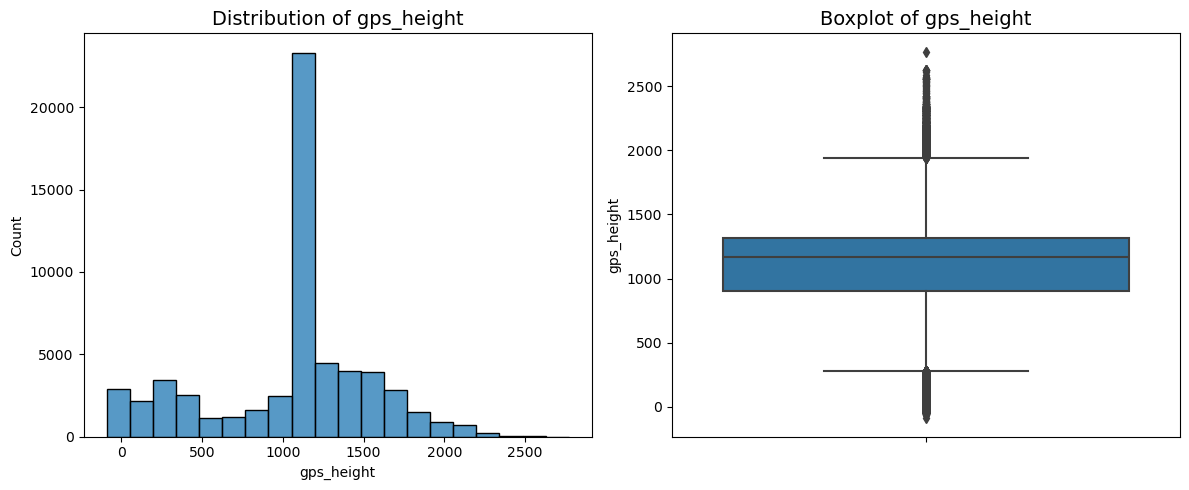

In [3]:
eda.univariate_analysis()


## __Bivariate Analysis__ 



======= Bivariate Analysis (Correlation Matrix Heatmap) =======



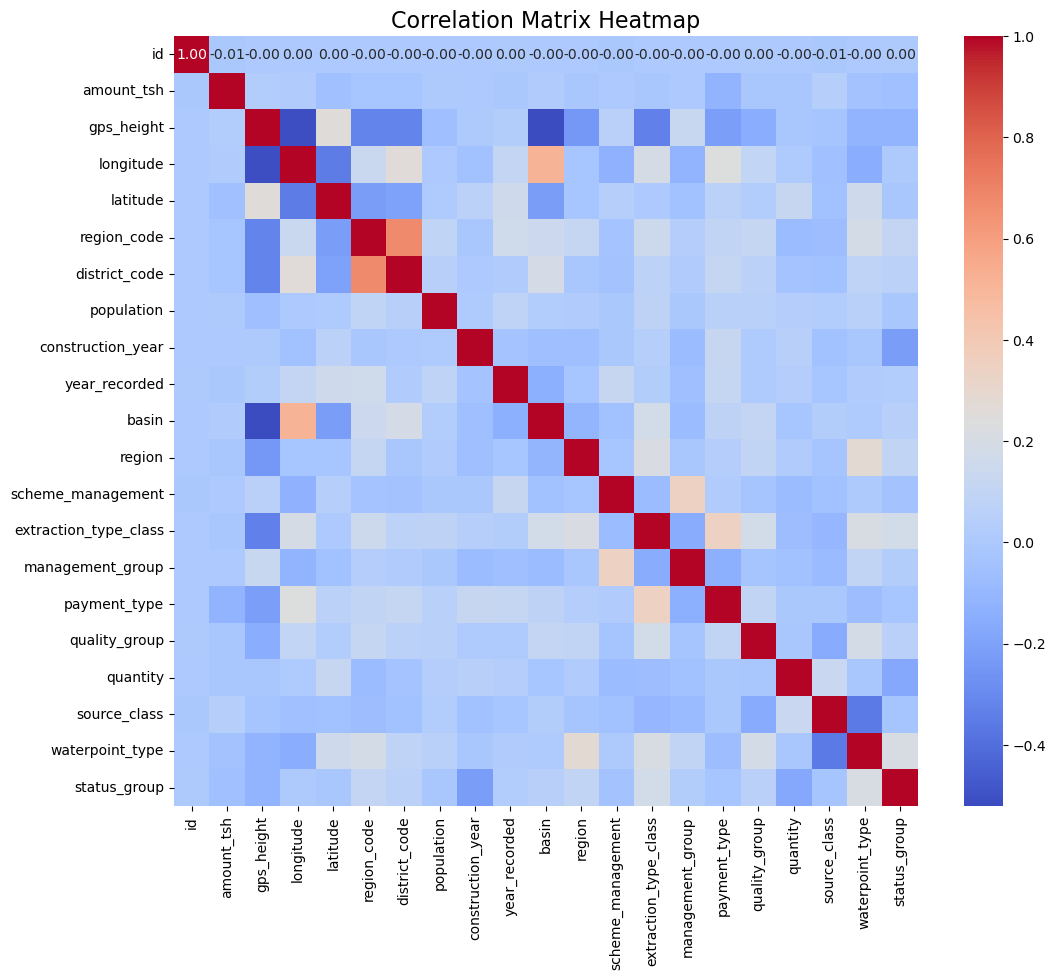

In [4]:
eda.bivariate_analysis()


## __Multivariate Analysis__ 



======= Multivariate Analysis (Geographical Distribution by Status) =======



C:\Users\tonyg\AppData\Local\Temp\ipykernel_9680\540607272.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(self.df['longitude'], self.df['latitude'], c=self.df[self.target_variable].map(status_colors), cmap=cmap, alpha=0.5)


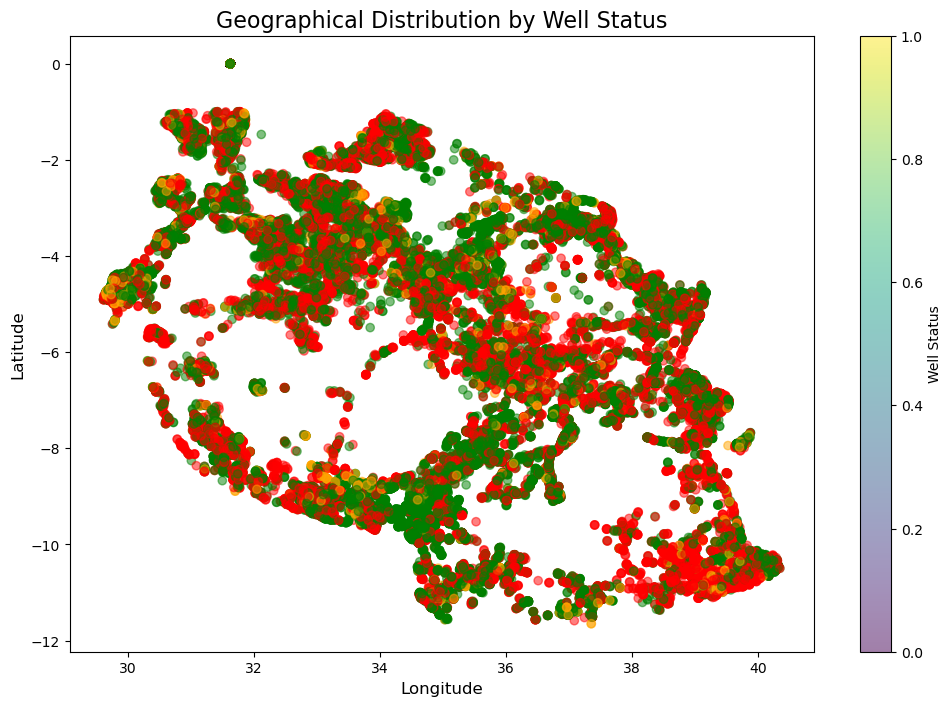

In [5]:
eda.multivariate_analysis()

## __Observations__

Noted the outliers - but would ignore them for now to reduce the rate of loss of data  

**Univariate Analysis:**

1.  **Categorical Features:** Several categorical features exhibit class imbalance, particularly `public_meeting` (with a high proportion of "True" values) and `permit` (with a majority of "True" values).
2.  **`amount_tsh`:** The distribution of `amount_tsh` is highly right-skewed, with most values concentrated around zero. Outliers with high values are present.
3.  **`gps_height`:**  `gps_height` shows a bimodal distribution with peaks around zero and 1300, suggesting two distinct groups of well locations based on elevation.

**Bivariate Analysis:**

4.  **Correlation Heatmap:** The heatmap reveals weak correlations between most numerical features and the encoded categorical features, indicating limited linear relationships.
5.  **`population` and `amount_tsh`:** A moderate negative correlation exists between `population` and `amount_tsh`, suggesting that wells serving larger populations might have lower construction costs.
6.  **Encoded Categorical Features:** Some encoded categorical features show weak positive correlations with `amount_tsh`, but the exact interpretation requires further analysis due to the encoding process.

**Multivariate Analysis:**

7.  **Geographical Distribution:** The heatmap illustrates the geographic distribution of well functionality statuses.
8.  **Clustering:** Clusters of functional and non-functional wells are visible in certain regions, highlighting potential regional influences on well status.
9.  **Longitude vs. Functionality:**  There appears to be a loose trend where functional wells are more concentrated at higher longitudes, but this requires further investigation.

